<a href="https://colab.research.google.com/github/jyryu3161/DrugDiscovery/blob/main/Lec3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up Condacolab in Google Colab

In [ ]:
!pip install -q condacolab # install the condacolab package
import condacolab # Import and initialize condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check() # verification of the installation

✨🍰✨ Everything looks OK!


Now you can use Conda commands directly in your notebook:

In [ ]:
# Create a new environment (optional)
!conda create -n myenv python=3.9 -y

# Install packages
!conda install conda-forge::rdkit -y

# List installed packages
!conda list

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    ld_impl_linux-64-2.43      |       h712a8e2_4         656 KB  conda-forge
    libffi-3.4.6               |       h2dba641_0          52 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
    libgomp-14.2.0             |       h767d61c_2         449 KB  conda-forge
    lib

In [ ]:
!pip install selfies
!pip install molvs

### Import Python Pacakges

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors
from rdkit.Chem import QED
from rdkit.Chem.Draw import IPythonConsole
from rdkit.DataStructs import FingerprintSimilarity
from rdkit import DataStructs
import numpy as np

IPythonConsole.ipython_useSVG = True


### Read and write molecular structures

In [ ]:
smiles = "CCO"  # Example: Ethanol
mol = Chem.MolFromSmiles(smiles)
w = Chem.SDWriter('ethanol.sdf')
w.write(mol)
w.close()

mol_from_sdf = Chem.SDMolSupplier('ethanol.sdf')[0]

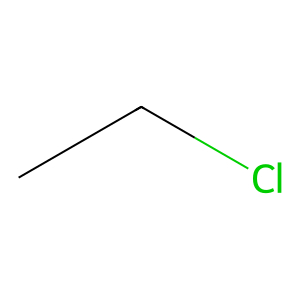

In [ ]:
Draw.MolToImage(mol)

In [ ]:
from rdkit import Chem

smiles_list = ["CCO", "CCN", "CCC", "CCCl"]  # Ethanol, Ethylamine, Propane, Chloroethane

writer = Chem.SDWriter('molecules.sdf')

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        writer.write(mol)

writer.close()

# 생성된 SDF 파일에서 분자 읽기
mols_from_sdf = [mol for mol in Chem.SDMolSupplier('molecules.sdf') if mol is not None]

# 확인
for i, mol in enumerate(mols_from_sdf):
    print(f"Molecule {i}: {Chem.MolToSmiles(mol)}")

Molecule 0: CCO
Molecule 1: CCN
Molecule 2: CCC
Molecule 3: CCCl


In [ ]:
smiles = Chem.MolToSmiles(mol)
inchi = Chem.MolToInchi(mol)
print("SMILES:", smiles)
print("InChI:", inchi)

SMILES: CCCl
InChI: InChI=1S/C2H5Cl/c1-2-3/h2H2,1H3


### SMILES vs SELFIES

In [ ]:
from rdkit import Chem
import selfies as sf

# 비교할 분자들의 SMILES 리스트
smiles_list = [
    "CCO",           # 에탄올
    "c1ccccc1",      # 벤젠
    "CC(=O)C"        # 아세톤
]

# SMILES와 SELFIES 비교 출력
print("=== SMILES vs SELFIES Comparison ===")
for smiles in smiles_list:
    # SMILES에서 RDKit 분자 객체 생성
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        continue

    # SMILES를 SELFIES로 변환
    selfies = sf.encoder(smiles)

    # 출력
    print(f"Original SMILES: {smiles}")
    print(f"SELFIES:        {selfies}")
    print("-" * 40)



=== SMILES vs SELFIES Comparison ===
Original SMILES: CCO
SELFIES:        [C][C][O]
----------------------------------------
Original SMILES: c1ccccc1
SELFIES:        [C][=C][C][=C][C][=C][Ring1][=Branch1]
----------------------------------------
Original SMILES: CC(=O)C
SELFIES:        [C][C][=Branch1][C][=O][C]
----------------------------------------


### Molecule Validation and Standardization

In [ ]:
from molvs import validate_smiles
print(validate_smiles('O=C([O-])c1ccccc1'))

from molvs import standardize_smiles
print(standardize_smiles('C[n+]1c([N-](C))cccc1'))


['INFO: [NeutralValidation] Not an overall neutral system (-1)']
CN=c1ccccn1C


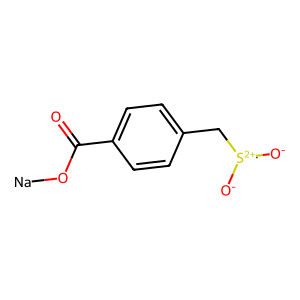

In [ ]:

from rdkit import Chem
mol = Chem.MolFromSmiles('[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1')
Draw.MolToImage(mol)


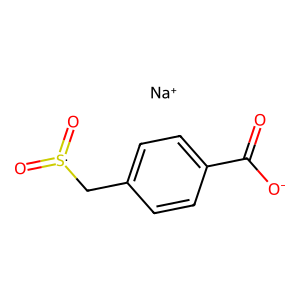

In [ ]:

from molvs import Standardizer
s = Standardizer()
smol = s.standardize(mol)
Draw.MolToImage(smol)


O=C([O-])c1ccc(C[S](=O)=O)cc1


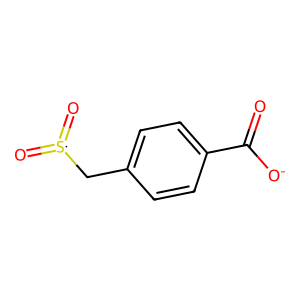

In [ ]:
from rdkit import Chem
from molvs import fragment

# LargestFragmentChooser 객체 생성
chooser = fragment.LargestFragmentChooser()
largest_mol = chooser(smol)
smiles = Chem.MolToSmiles(largest_mol)
print(smiles)
Draw.MolToImage(largest_mol)


### Atom and Bond Information

In [ ]:
from rdkit import Chem

# Generate molecules with SMILES (e.g., ethanol)
smiles = "CCO"
mol = Chem.MolFromSmiles(smiles)

print("=== Atom Information ===")
for atom in mol.GetAtoms():
    print(f"Atom Index: {atom.GetIdx()}, Symbol: {atom.GetSymbol()}, Atomic Number: {atom.GetAtomicNum()}")

print("\n=== Bond Information ===")
for bond in mol.GetBonds():
    print(f"Bond between {bond.GetBeginAtomIdx()} and {bond.GetEndAtomIdx()}, Type: {bond.GetBondType()}")

=== Atom Information ===
Atom Index: 0, Symbol: C, Atomic Number: 6
Atom Index: 1, Symbol: C, Atomic Number: 6
Atom Index: 2, Symbol: O, Atomic Number: 8

=== Bond Information ===
Bond between 0 and 1, Type: SINGLE
Bond between 1 and 2, Type: SINGLE


### Read and Print SDF File Content

In [ ]:

smiles = "CCO"  # Example: Ethanol
mol = Chem.MolFromSmiles(smiles)
mol.SetProp("Name", "Ethanol")
mol.SetProp("CAS", "64-17-5")
w = Chem.SDWriter('ethanol_annotated.sdf')
w.write(mol)
w.close()

# Read and print SDF file content
with open('ethanol_annotated.sdf', 'r') as f:
    sdf_content = f.read()
print(sdf_content)

mol_annotated = Chem.SDMolSupplier('ethanol_annotated.sdf')[0]



     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END
>  <Name>  (1) 
Ethanol

>  <CAS>  (1) 
64-17-5

$$$$

Name: Ethanol
CAS: 64-17-5


### Calculate Molecular Properties

In [ ]:

mol_weight = Descriptors.MolWt(mol)
qed_score = QED.qed(mol)
logp = MolLogP(mol)

print(f"MW: {mol_weight:.2f}, QED: {qed_score:.3f}, logP: {logp:.2f}")


MW: 46.07, QED: 0.407, logP: -0.00


### Molecular Fingerprints

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, DataStructs
import numpy as np

# 예시 분자 생성
smiles = "CCO"  # 에탄올
mol = Chem.MolFromSmiles(smiles)

# Morgan Fingerprint 생성
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fp = morgan_gen.GetFingerprint(mol)

# 기본 정보 출력
print("=== Basic Fingerprint Information ===")
print("Fingerprint bit count (number of 1s):", fp.GetNumOnBits())
print("Fingerprint as binary string (first 50 bits for brevity):", fp.ToBitString()[:50] + "...")

# 활성화된 비트 인덱스 추출
on_bits = list(fp.GetOnBits())
print("\n=== Detailed Fingerprint Information ===")
print("Indices of activated bits (1s):", on_bits)
print("Total number of bits:", fp.GetNumBits())

# 비트 벡터를 NumPy 배열로 변환 (선택 사항)
fp_array = np.zeros((1,), dtype=np.int8)
DataStructs.ConvertToNumpyArray(fp, fp_array)
print("\nFingerprint as NumPy array (first 50 elements):")
print(fp_array[:50])


=== Basic Fingerprint Information ===
Fingerprint bit count (number of 1s): 6
Fingerprint as binary string (first 50 bits for brevity): 00000000000000000000000000000000010000000000000000...

=== Detailed Fingerprint Information ===
Indices of activated bits (1s): [33, 80, 222, 294, 386, 807]
Total number of bits: 1024

Fingerprint as NumPy array (first 50 elements):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs

smiles = "CCO"  # Ethanol
mol = Chem.MolFromSmiles(smiles)
smiles2 = "CC"  # Ethan
mol2 = Chem.MolFromSmiles(smiles2)

morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fp = morgan_gen.GetFingerprint(mol)
fp2 = morgan_gen.GetFingerprint(mol2)

similarity = DataStructs.TanimotoSimilarity(fp, fp2)

print(f"Similarity: {similarity:.2f}")

ModuleNotFoundError: No module named 'rdkit'